In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [2]:
def get_data(ruta):
	data_x=pd.read_csv(ruta+"X.csv",header=None)
	data_y=pd.read_csv(ruta+"Y.csv",header=None)
	data_p=pd.read_csv(ruta+"P.csv",header=None)
	X=data_x.iloc[:,:].values
	Y=data_y.iloc[:,:].values
	P=data_p.iloc[:,:].values
	return X,Y,P

In [3]:
def normalizar(X):
	mu=np.mean(X,axis=0)
	sigma=np.std(X,axis=0)
	Xnorm=(X-mu)/sigma
	return Xnorm,mu,sigma 

In [4]:
def convertir_vetor_matriz(vetor,tam_matriz):
	matriz=vetor.reshape(tam_matriz,tam_matriz)
	return matriz

In [5]:
def desenhar_grupo_imagens(imgs):
	num_imgs=imgs.shape[0]
	tam_img=int(np.sqrt(imgs.shape[1]))
	if(num_imgs>10):
		tam_grid_fil=int(np.floor(np.sqrt(num_imgs)))
		tam_grid_col=tam_grid_fil
	else:
		tam_grid_fil=1
		tam_grid_col=num_imgs
	fig,axis=plt.subplots(tam_grid_fil,tam_grid_col,figsize=(20,20),sharex=True, sharey=True)
	#fig.tight_layout()
	fig.tight_layout(pad=3.0)
	if(tam_grid_fil==1):
		for i in range(num_imgs):
			vetor_img=imgs[i,:]
			img=convertir_vetor_matriz(vetor_img,tam_img)
			axis[i].imshow(img,cmap="gray")
	else:
		k=0
		for i in range(tam_grid_fil):
			for j in range(tam_grid_col):
				if(k>num_imgs-1):
					break
				vetor_img=imgs[k,:]
				img=convertir_vetor_matriz(vetor_img,tam_img)
				axis[i,j].imshow(img,cmap="gray")
			#	axis[i,j].set_title("Img: "+str(k+1),size=5)
				axis[i,j].axis("off")
				k=k+1
			if(k>num_imgs-1):
				break

In [6]:
def desenhar_grupo_imagens_predicted(imgs, pred):
	num_imgs=imgs.shape[0]
	tam_img=int(np.sqrt(imgs.shape[1]))
	if(num_imgs>10):
		tam_grid_fil=int(np.floor(np.sqrt(num_imgs)))
		tam_grid_col=tam_grid_fil
	else:
		tam_grid_fil=1
		tam_grid_col=num_imgs
	fig,axis=plt.subplots(tam_grid_fil,tam_grid_col,figsize=(20,20),sharex=True, sharey=True)
	#fig.tight_layout()
	fig.tight_layout(pad=3.0)
	if(tam_grid_fil==1):
		for i in range(num_imgs):
			vetor_img=imgs[i,:]
			img=convertir_vetor_matriz(vetor_img,tam_img)
			axis[i].imshow(img,cmap="gray")
			axis[i].set_title("Predicción: "+pred[i],size=20)

	else:
		k=0
		for i in range(tam_grid_fil):
			for j in range(tam_grid_col):
				#if(k>num_imgs-1):
				#	break
				vetor_img=imgs[k,:]
				img=convertir_vetor_matriz(vetor_img,tam_img)
				axis[i,j].imshow(img,cmap="gray")
				axis[i,j].set_title("Prediction: "+pred[k],size=25)
				axis[i,j].axis("off")
				k=k+1
			if(k>num_imgs-1):
				break

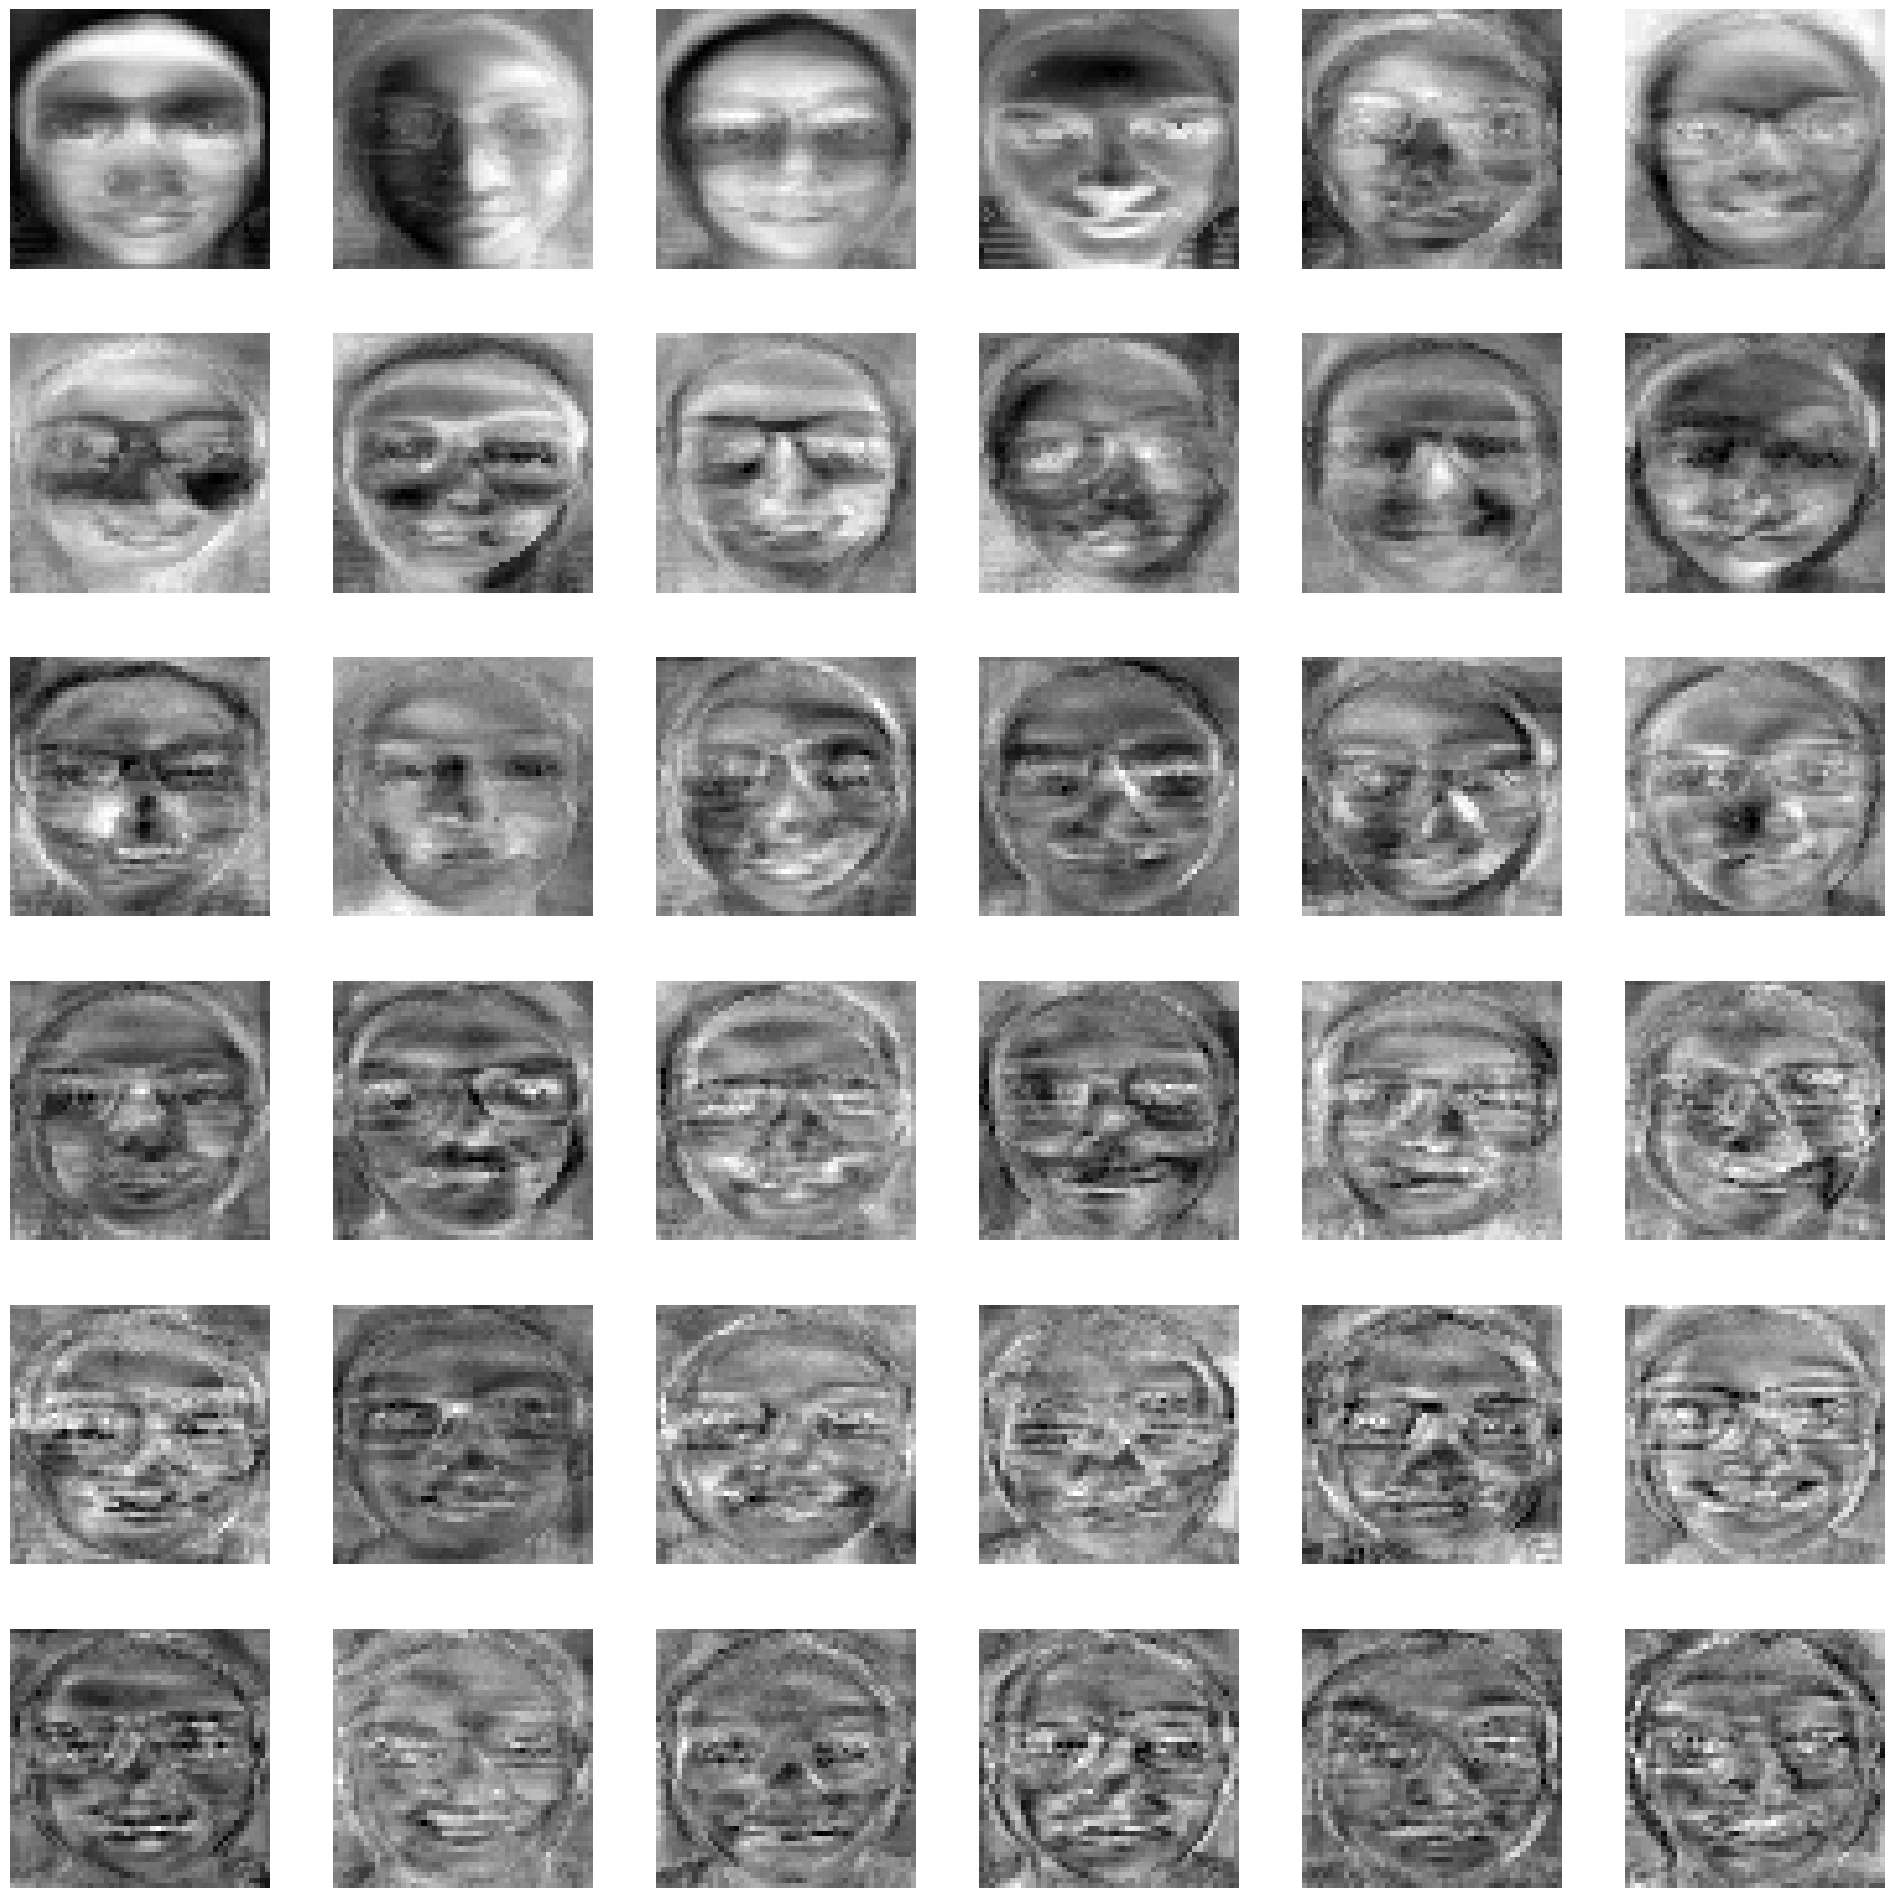

In [7]:
ruta="datos/"
n=36
X,Ytot,P=get_data(ruta)
Y = Ytot[:,0]
Xnorm,mu,sigma=normalizar(X)
U,D,VT=svd(Xnorm)
V=VT.T
desenhar_grupo_imagens(V[:,0:n].T)
plt.show()

In [8]:
# Person1

P1 = X[0:(Ytot[:,0] == 0).sum(),:]

# person2

P2 = X[(Ytot[:,0] == 0).sum():(Ytot[:,0] == 0).sum()+(Ytot[:,0] == 1).sum(),:]

In [9]:
eigenf = [0,1]

PCAcoord = V[:,eigenf]

In [10]:
PCAcordsP1 = PCAcoord.T @ (P1-mu).T
PCAcordsP2 = PCAcoord.T @ (P2-mu).T

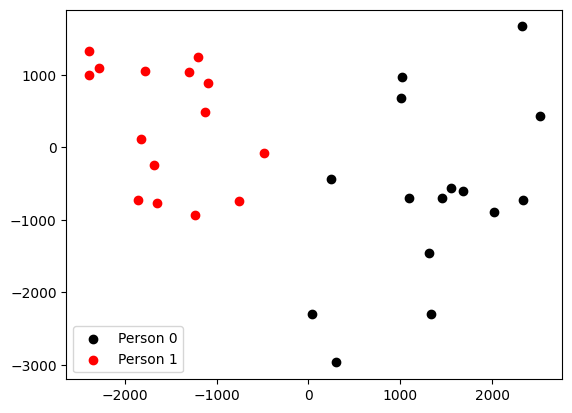

In [11]:
plt.scatter(PCAcordsP1[0,:],PCAcordsP1[1,:],color='k', label='Person %i'%Y[0])
plt.scatter(PCAcordsP2[0,:],PCAcordsP2[1,:],color='r', label='Person %i'%Y[15])
plt.legend()
# plt.tick_params(labelleft=False, labelbottom=False)
plt.show()

## Prediction

In [12]:
def findClosetsCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:]-centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [13]:
def computeCentroids(X, idx,K):
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:] += X[i,:]
        count[index] +=1
    
    return centroids/count


In [14]:
def Kmeans(X, centroids, idx, n_iter,K):
    
    m,n = X.shape[0],X.shape[1]
    
    for i in range(n_iter):        
        centroids = computeCentroids(X, idx, K)        
        idx = findClosetsCentroids(X,centroids)
        
    return centroids, idx

In [15]:
def plotKmeans(X, centroids, idx, K):
    
    m,n = X.shape[0],X.shape[1]
    
    fig= plt.plot(figsize = (6,6))
    
    color = 'rgb'
    for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            #plotting class k
            plt.scatter(X[grp[:,0],0],X[grp[:,0],1], c=color[k-1], s=25, label= 'Person '+str(k-1))
    plt.scatter(centroids[:,0],centroids[:,1],s=30, marker="x",c='black', linewidth=3, label='centroids')
#     plt.tick_params(labelleft=False, labelbottom=False)    
    plt.legend()
    plt.tight_layout()

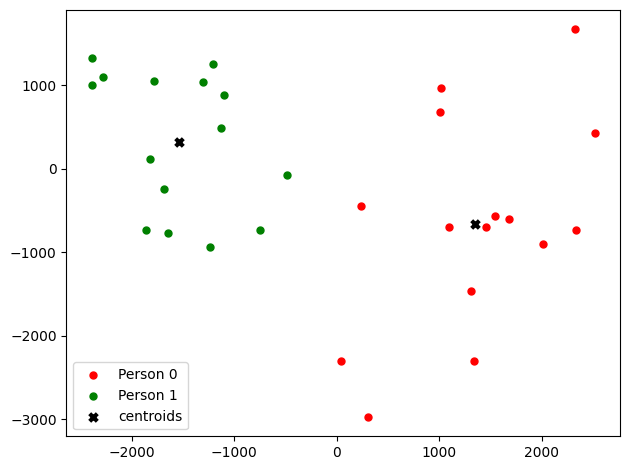

In [16]:

Z = (np.hstack((PCAcordsP1,PCAcordsP2))).T

m,n = Z.shape[0],Z.shape[1]
K = 2

n_iter= 50

initial_centroids = np.array((Z[0,:],Z[15,:]))
idx = findClosetsCentroids(Z, initial_centroids)

centroids, idx = Kmeans(Z, initial_centroids, idx, n_iter,K)

plotKmeans(Z, centroids, idx, K)

In [17]:
def new_pictures(X, Ytot):
    return X[np.where(Ytot=='NUEVAS')[0],:]

In [18]:
def prediction(PCAcoordNew, centroids, Ytot):
    pred = []
    names = pd.unique(Ytot[:,1])
    idx = findClosetsCentroids(PCAcoordNew, centroids)
    for i in range(len(PCAcoordNew)):
        pred.append(names[int(idx[i][0]-1)])
    return pred

In [19]:
new_people = new_pictures(X,Ytot)
PCAcoordNew = PCAcoord.T @ (new_people-mu).T

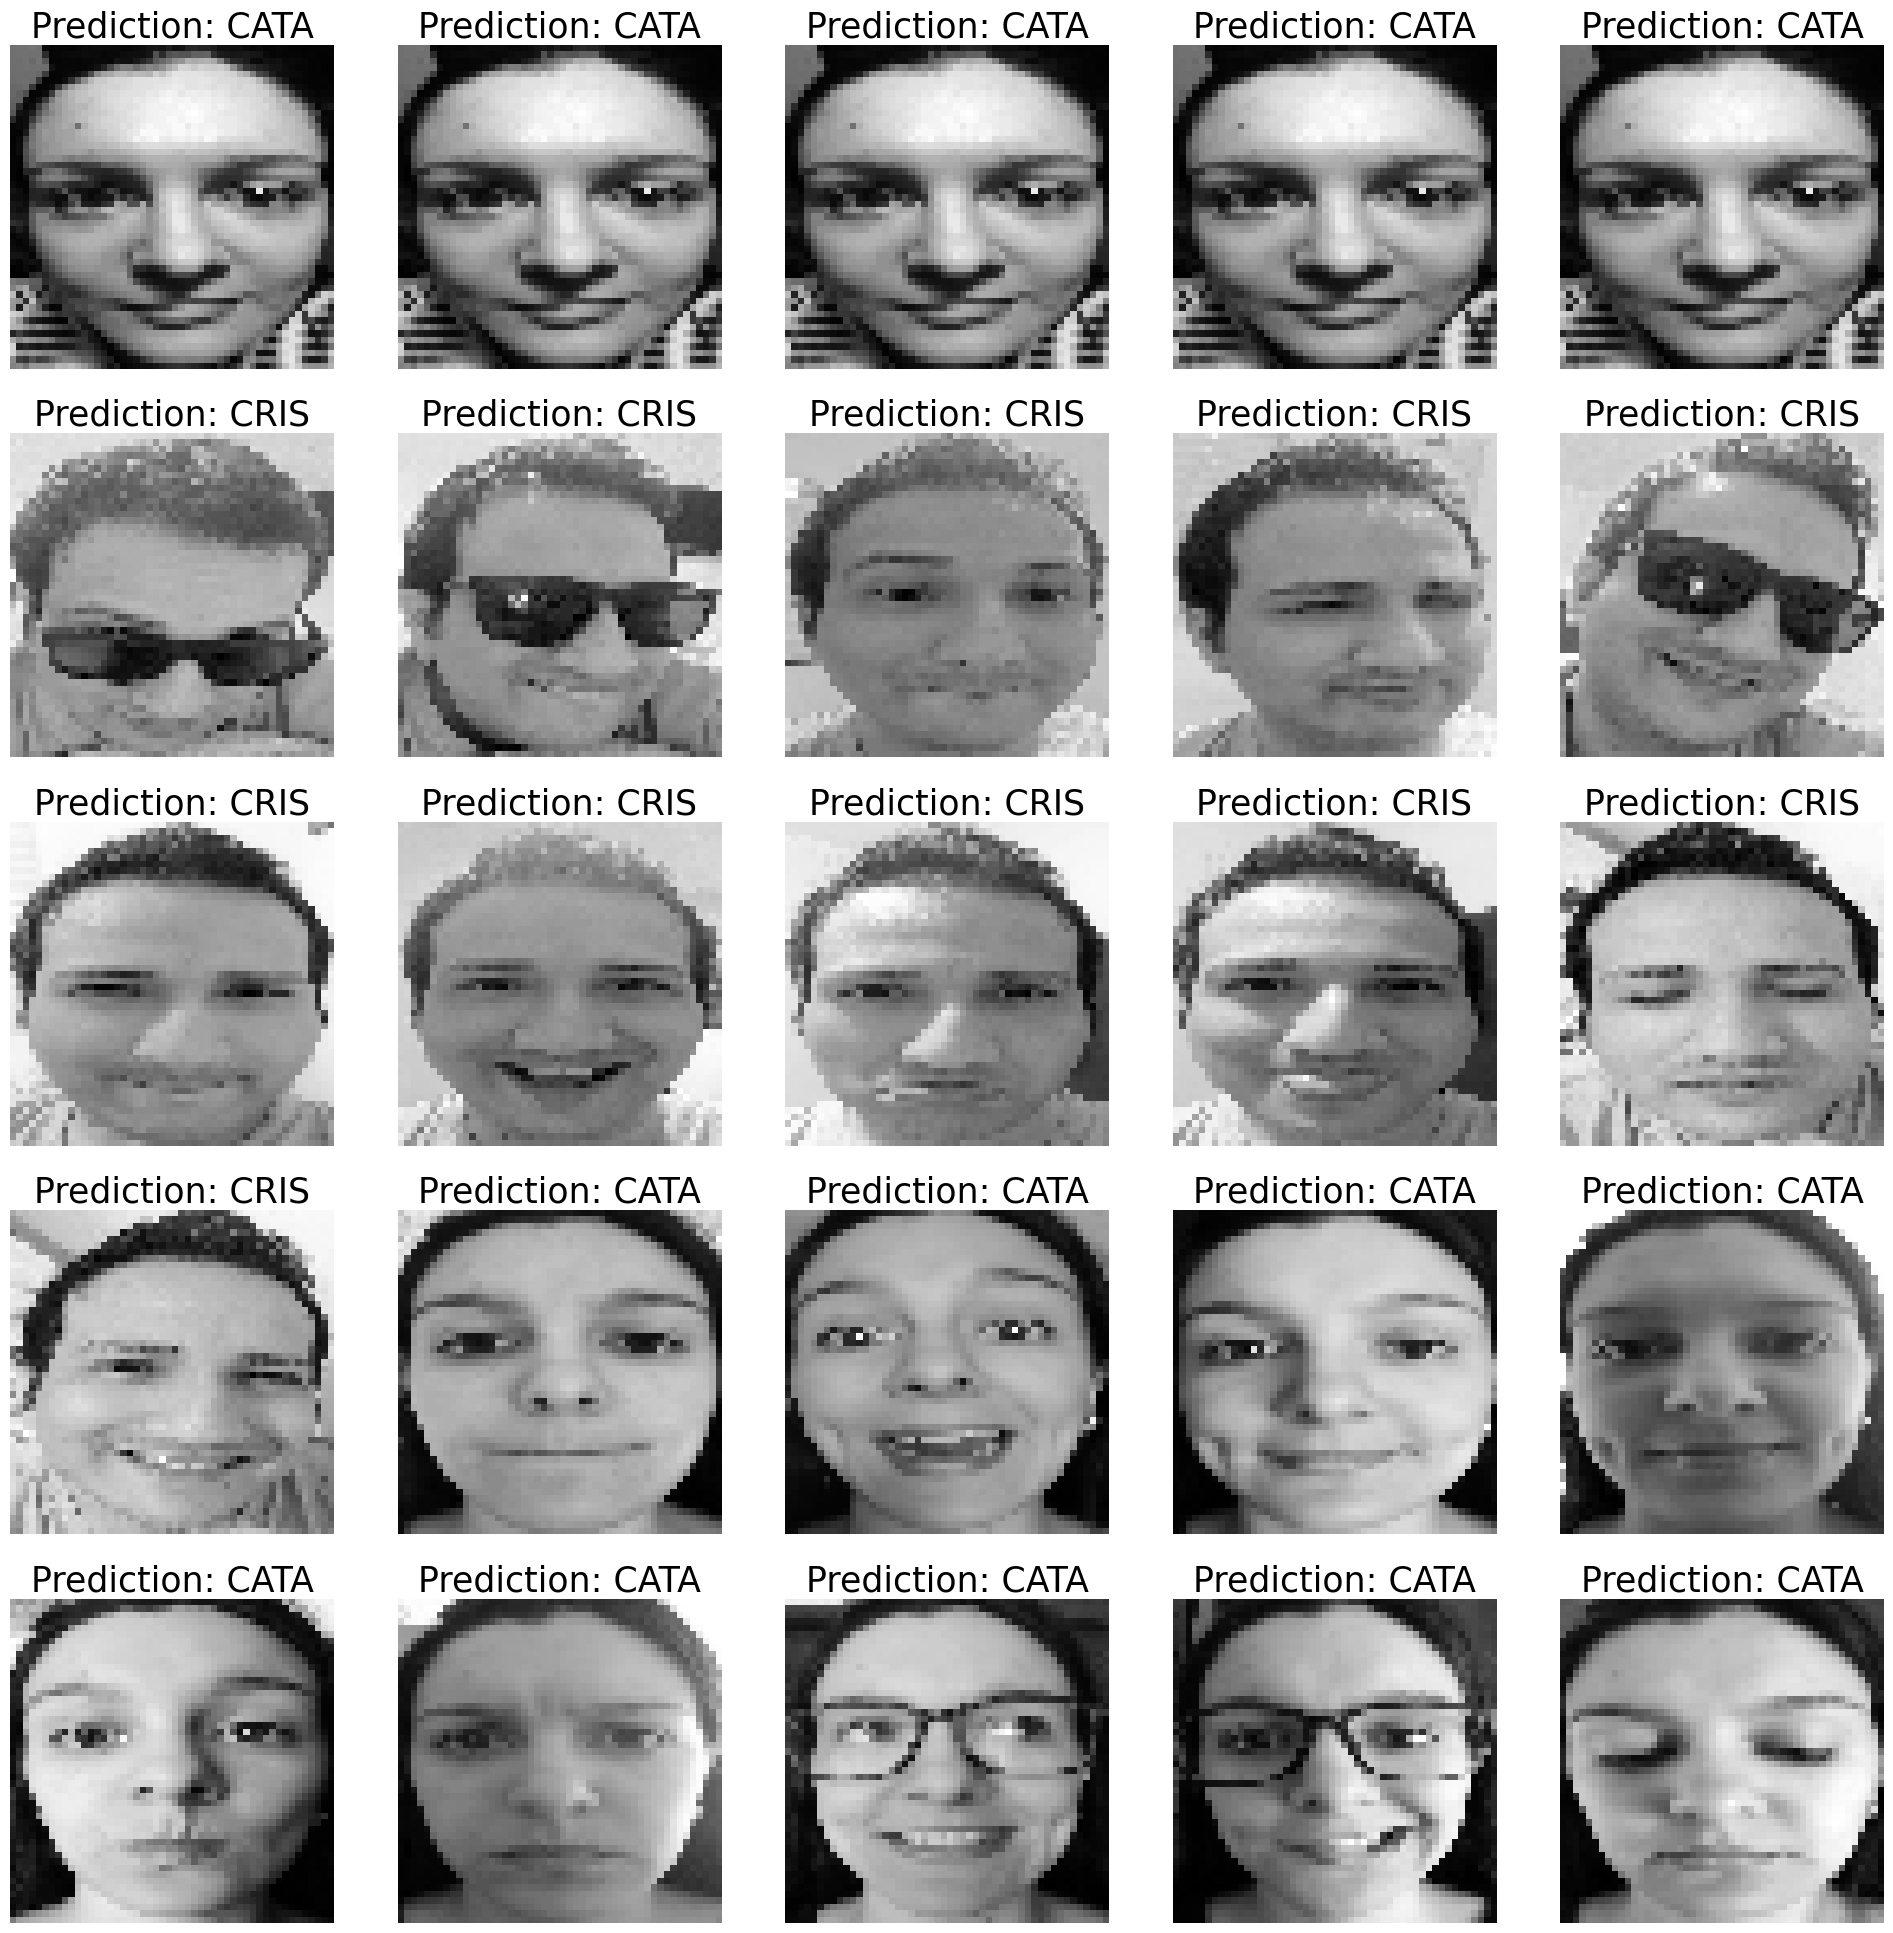

In [23]:
pred = prediction(PCAcoordNew.T, centroids, Ytot)
desenhar_grupo_imagens_predicted(new_people,pred)

### Prediction with SVM

In [22]:
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Since we have a supervisioned problem, we can use SVM

Y_train = Y[:(Ytot[:,0] == 0).sum()+(Ytot[:,0] == 1).sum()].reshape(Z.shape[0],1)

c= 1
sigma = 1
gamma=1/(2*sigma)

classifier = SVC(C=c,kernel='linear')
# np.ravel transform matrix in vector or viceversa
classifier.fit(Z, np.ravel(Y_train).astype(np.uint8))

In [ ]:
plt.figure(figsize = (8,6))
x_min, x_max = Z[:, 0].min() - 0.1, Z[:, 0].max() + 0.1
y_min, y_max = Z[:, 1].min() - 0.1, Z[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 10), np.arange(y_min, y_max, 10))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.15)

plt.scatter(PCAcordsP1[0,:],PCAcordsP1[1,:], c='blue',marker ='x')
plt.scatter(PCAcordsP2[0,:],PCAcordsP2[1,:], c='red',marker ='o')

plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")

plt.tick_params(labelleft=False, labelbottom=False)    

plt.title('SVM for training data C=%f'%c , size=15)


In [ ]:
def names_pred(pred_list,names):
    pred = []
    for i in range(len(pred_list)):
        pred.append(names[(pred_list[i])])
    return pred

In [ ]:
plt.figure(figsize = (8,6))
x_min, x_max = Z[:, 0].min() - 0.1, Z[:, 0].max() + 0.1
y_min, y_max = Z[:, 1].min() - 0.1, Z[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 10), np.arange(y_min, y_max, 10))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.15)

plt.scatter(PCAcordsP1[0,:],PCAcordsP1[1,:], c='blue',marker ='x', label = 'Person 0')
plt.scatter(PCAcordsP2[0,:],PCAcordsP2[1,:], c='red',marker ='o', label='Person1')
plt.scatter(PCAcoordNew[0,:],PCAcoordNew[1,:], c='black',marker ='o', label='New pictures')


plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")
plt.tick_params(labelleft=False, labelbottom=False)    

plt.legend()
plt.title('SVM for training data C=%f'%c , size=15)


In [ ]:
pos,neg = (pred_SVM==1).reshape(len(pred_SVM),1),(pred_SVM==0).reshape(len(pred_SVM),1)


plt.figure(figsize = (8,6))
x_min, x_max = Z[:, 0].min() - 0.1, Z[:, 0].max() + 0.1
y_min, y_max = Z[:, 1].min() - 0.1, Z[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 10), np.arange(y_min, y_max, 10))


# 1 is the nivel

# classification of each grid value to define the boundary

bound = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
bound = bound.reshape(xx.shape)
plt.pcolormesh(xx, yy, bound,cmap=plt.cm.Paired, alpha=0.15)

plt.scatter(PCAcordsP1[0,:],PCAcordsP1[1,:], c='blue',marker ='x', label = 'Person 0')
plt.scatter(PCAcordsP2[0,:],PCAcordsP2[1,:], c='red',marker ='o', label='Person1')
plt.scatter(PCAcoordNew.T[np.where(pos==True)[0],0],PCAcoordNew.T[np.where(pos==True)[0],1], c='green',marker ='+', label='New pictures')
plt.scatter(PCAcoordNew.T[np.where(neg==True)[0],0],PCAcoordNew.T[np.where(neg==True)[0],1], c='black',marker ='+', label='New pictures')



plt.contour(xx,yy,classifier.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape),1,colors="b")
plt.tick_params(labelleft=False, labelbottom=False)    

plt.legend()
plt.title('SVM for training data C=%f'%c , size=15)


In [ ]:
def desenhar_grupo_imgs_test(imgs,prediccion):
	num_imgs=imgs.shape[0]
	tam_img=int(np.sqrt(imgs.shape[1]))
	if(num_imgs>10):
		tam_grid_fil=int(np.floor(np.sqrt(num_imgs)))+1
		tam_grid_col=tam_grid_fil
	else:
		tam_grid_fil=1
		tam_grid_col=num_imgs

	fig,axis=plt.subplots(tam_grid_fil,tam_grid_col,figsize=(20,20),sharex=True, sharey=True)
	#fig.tight_layout()
	fig.tight_layout(pad=3.0)
	if(tam_grid_fil==1):
		for i in range(num_imgs):
			vetor_img=imgs[i,:]
			img=convertir_vetor_matriz(vetor_img,tam_img)
			axis[i].imshow(img,cmap="gray")
			axis[i].set_title("Predicción: "+prediccion[i],size=10)
	else:
		print(tam_grid_fil)
		k=0
		for i in range(tam_grid_fil):
			for j in range(tam_grid_col):
				if(k>num_imgs-1):
					break
				vetor_img=imgs[k,:]
				img=convertir_vetor_matriz(vetor_img,tam_img)
				axis[i,j].imshow(img,cmap="gray")
				axis[i,j].set_title("Predicción: "+prediccion[k],size=5)
				#axis[i,j].axis("off")	
				k=k+1
			if(k>num_imgs-1):
				break

In [ ]:

# names of people
names = pd.unique(Ytot[:,1])

#prediction with SVM
pred_SVM = classifier.predict(PCAcoordNew.T)

#prediction with names
prediction = names_pred(pred_SVM,names)

# desenhar_grupo_imagens_predicted(new_people,prediction)
desenhar_grupo_imgs_test(new_people,prediction)